# Introduction

This notebook continues from `1. preprocessing.ipynb`, where we ingested the data and stored it in a `sqlite` database.

In this notebook we will : 

1. Examine the distributions of features and target class 
2. Perform Exploratory Data Analysis 

In [2]:
# Library Imports
import sqlite3 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load in data
conn = sqlite3.connect("../datasets/ICU_data.sqlite")
df = pd.read_sql_query(\
"""
SELECT 
    *
FROM ICU_data
"""
, con=conn)
conn.close()

In [4]:
# See if data was loaded in without issue
df.head(2)

,Survive,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency
0,0,87,3,1,1,80,96,1
1,1,27,1,1,1,142,88,1


# Exploratory Analysis

Now we explore the distributions of the features & target variable.

## Variable Distributions

We can start by examining the distributions of each of our features. 

array([[<AxesSubplot: title={'center': 'Survive'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'AgeGroup'}>],
       [<AxesSubplot: title={'center': 'Sex'}>,
        <AxesSubplot: title={'center': 'Infection'}>,
        <AxesSubplot: title={'center': 'SysBP'}>],
       [<AxesSubplot: title={'center': 'Pulse'}>,
        <AxesSubplot: title={'center': 'Emergency'}>, <AxesSubplot: >]],
      dtype=object)

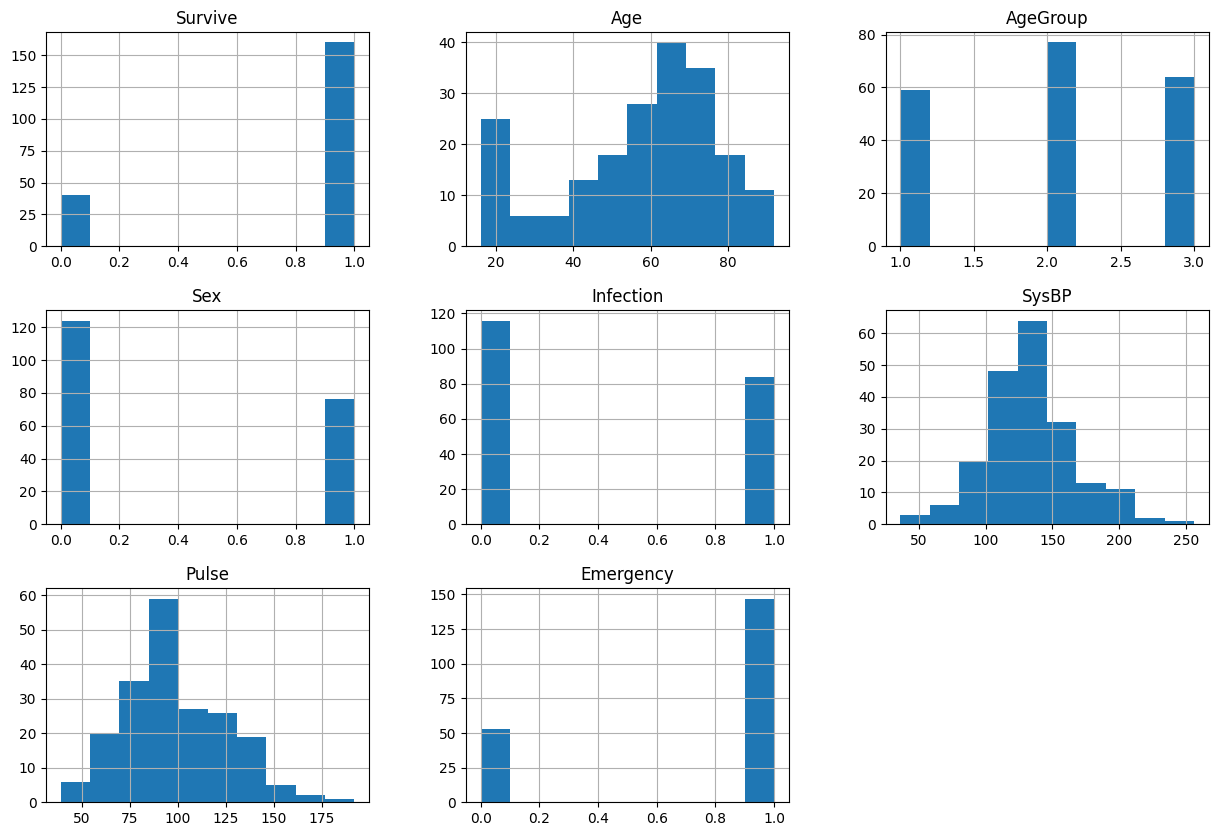

In [5]:
df.hist(figsize=(15, 10))

Observe that we have 3 numeric features : 
1. Age
2. SysBP
3. Pulse 

The distributions for these 3 numeric features are relatively normal (except for Age which is bimodal). This means that we need not pre-process these numeric features as heavily as we otherwise would. 

For example if one of the features were cumulative resulting in a heavy tailed distribution, we would consider a log transform to normalize the distribution. 

## Feature Correlation

The machine learning 


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'Survive'),
  Text(0, 1.5, 'Age'),
  Text(0, 2.5, 'AgeGroup'),
  Text(0, 3.5, 'Sex'),
  Text(0, 4.5, 'Infection'),
  Text(0, 5.5, 'SysBP'),
  Text(0, 6.5, 'Pulse'),
  Text(0, 7.5, 'Emergency')])

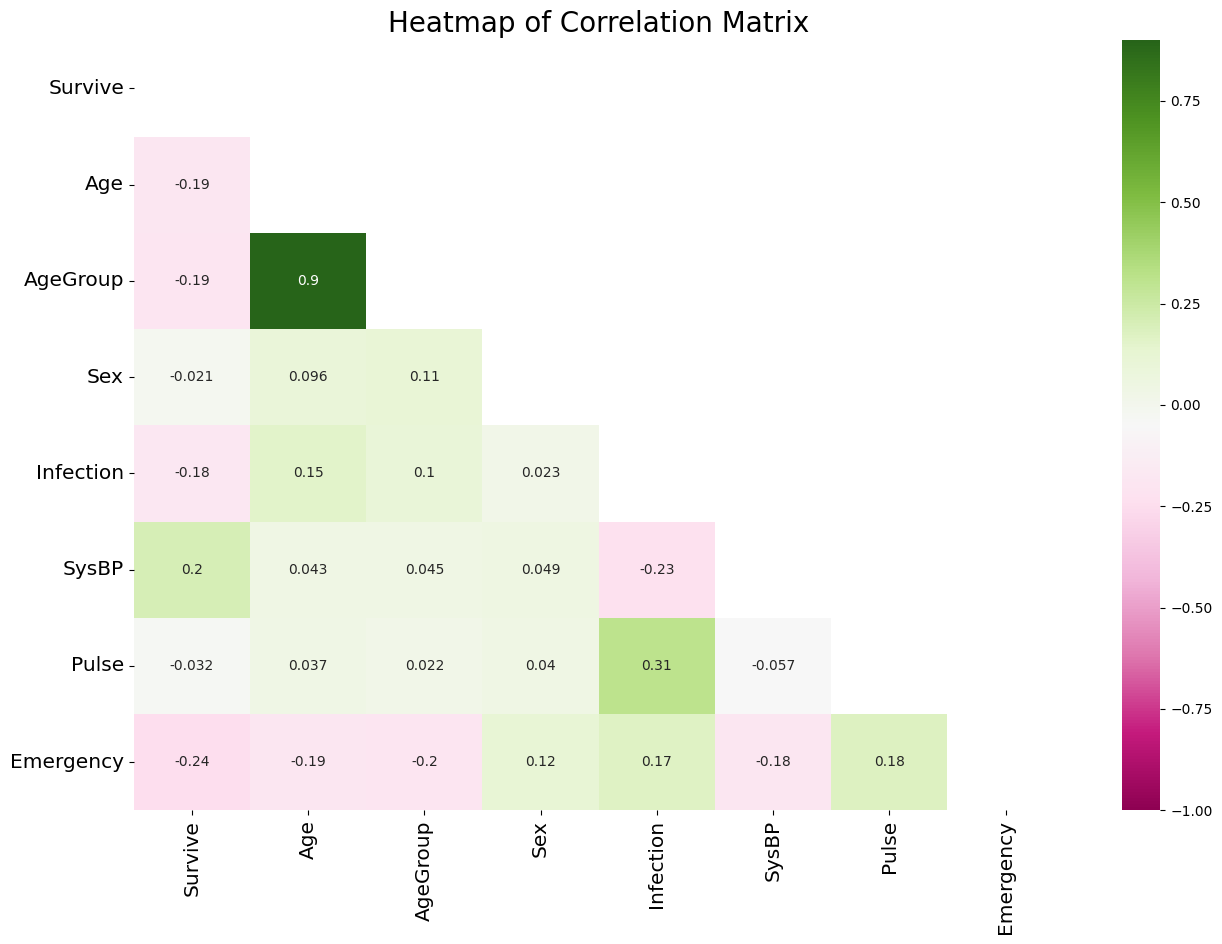

In [6]:
fig = plt.figure(figsize=(15,10))
corr = df.corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap="PiYG",vmin=-1,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           mask=mask).set_title('Heatmap of Correlation Matrix', fontsize = 20)

plt.xticks(rotation = 90,fontsize=14.5)
plt.yticks(rotation=0, fontsize=14.5)
# corr.style.background_gradient()

The `pandas` `corr()` implementation uses Spearman correlation, which measures the strength and direction of association between two variables. 

In the dataset since all the categorical features are binary, we can also compute their correlation scores with other features. 

From the dataset we observe that no two sets of features are strongly correlated (>0.7), whether positively or negatively. The exception is the correlation between `Age` & `AgeGroup` which is expected since the latter is simply a binned version of the former. 

The lack of strong correlation between features means we need not remove features from the dataset to avoid the issue of multicolinearity. 

## Breakdown by Target

It may be informative to examine the distributions of features in relation to the target variable

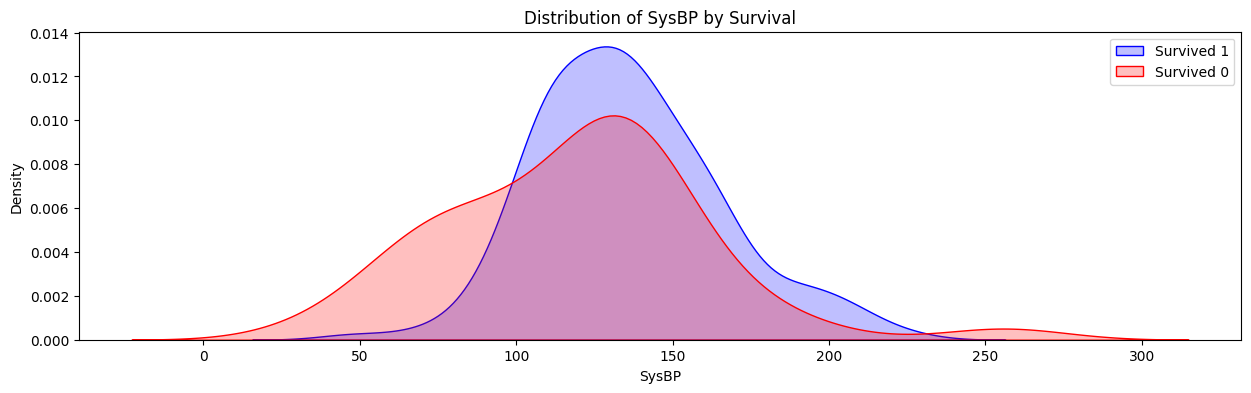

In [10]:
fig, ax = plt.subplots(figsize =(15, 4))
sns.kdeplot(data=df.loc[df['Survive']==1, 'SysBP'], color = 'b', fill=True, label='Survived 1' , ax=ax)
sns.kdeplot(data=df.loc[df['Survive']==0, 'SysBP'], color = 'r', fill=True, label='Survived 0' , ax=ax)
ax.legend()
ax.set_title("Distribution of SysBP by Survival")
plt.show()

`SysBP` had the greatest correlation with the target among the numeric variables. Here we examine the KDE plot of this feature for both classes. 

We observe that the modes of the distribution in both cases are roughly equal, however for patients who did not survive the distribution is more heavily right skewed. 

This indicates that incoming patients with a lower `SysBP` value are more likely to not survive. 

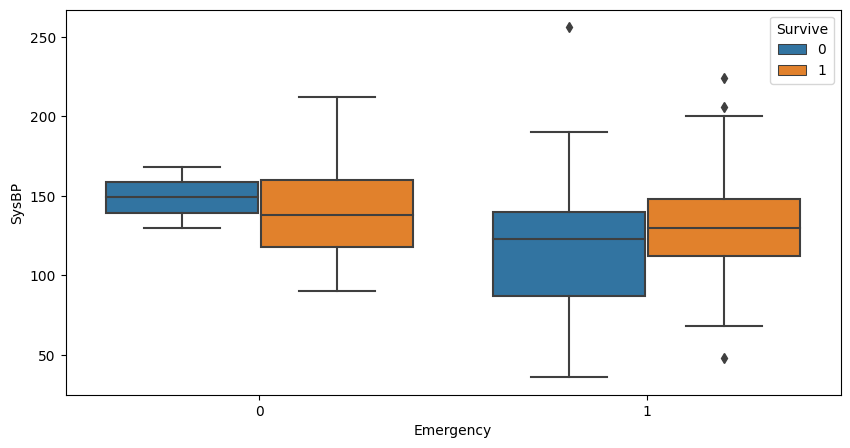

In [8]:
fig, ax = plt.subplots(figsize =(10, 5))
sns.boxplot(data=df, x = 'Emergency', y = 'SysBP', hue='Survive', ax = ax)
plt.show()

From the boxplot above we observe that the `SysBp` values of emergency patients tend to be lower than that of non-emergency patients, regardless of survival. 

Emergency patients who did not survive tend to have slightly higher median `SysBP` values than those that did survive. 

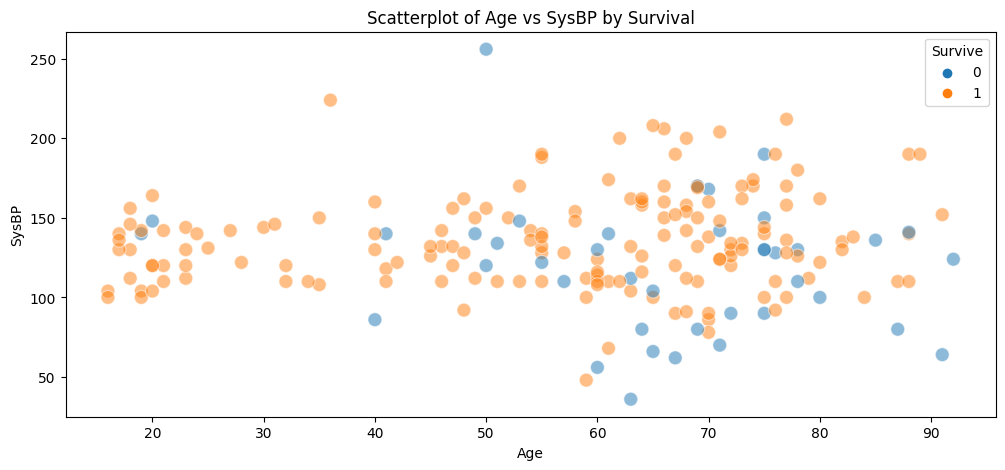

In [11]:
fig, ax = plt.subplots(figsize = (12, 5))
sns.scatterplot(data=df, x = 'Age', y='SysBP', hue = 'Survive', alpha = 0.5, s = 100)
ax.set_title("Scatterplot of Age vs SysBP by Survival")
plt.show()

Examining the scatterplot above, we can see that patients who did not survive are concentrated more heavily in the bottom left corner of the plot. 

This indicates that older ICU patients with lower `SysBP` values are more likely to not survive. 